There are my personal solutions to ISLP Ch.2 I have no guarantees to correctness, just thought it would be helpful to post for other self-learners such as myself.

In [1]:
import ISLP
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots

## 8a.
(the ISLP load_data function doesn't have school names in the index, so be sure to use the csv)

In [2]:
college = pd.read_csv(r'..\ISLP datasets\College.csv')
print(college.head(5))

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

## 8b.
(Unnamed: 0 is a placeholder for a blank column name)

In [3]:
#Can copy code from book but I will just skip the intermediate steps
college = college.rename({'Unnamed: 0':'College'},axis=1).set_index('College')

## 8c.

In [4]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## 8d.

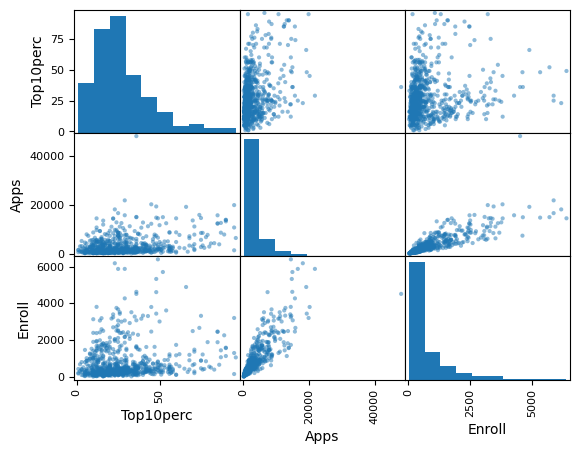

In [5]:
pd.plotting.scatter_matrix(college[['Top10perc','Apps','Enroll']]);

## 8e.

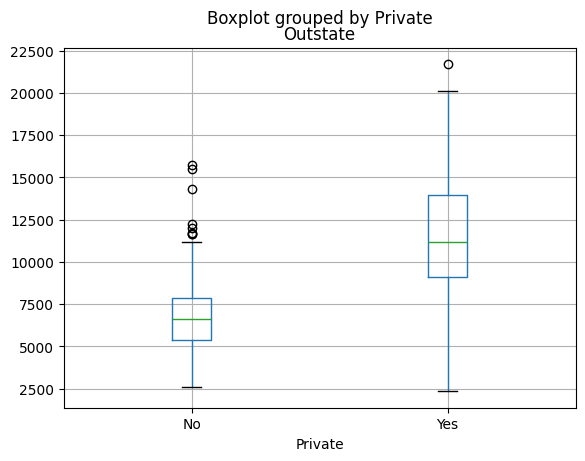

In [6]:
college.boxplot('Outstate', by='Private');

## 8f. 
(ISLP question erroneously assumes the range of Top10perc is from 0-1 and not 0-100)

No     699
Yes     78
Name: Elite, dtype: int64
Axes(0.1,0.15;0.8x0.75)


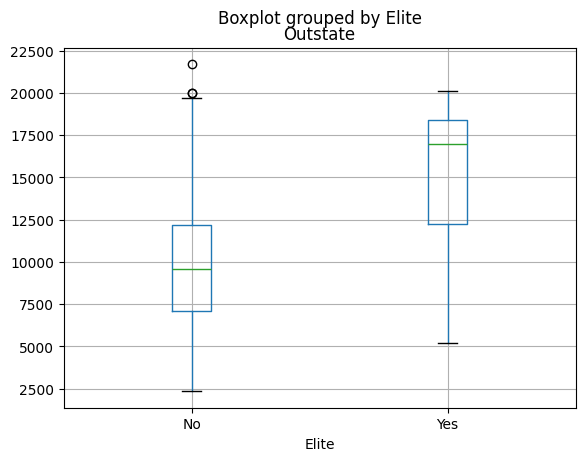

In [7]:
#corrected code for percentage
college['Elite'] = pd.cut(college['Top10perc'],[0,50,100],
                          labels=['No','Yes'])

print(college['Elite'].value_counts())

print(college.boxplot('Outstate',by='Elite'));

## 8g.

Figure(1000x500)


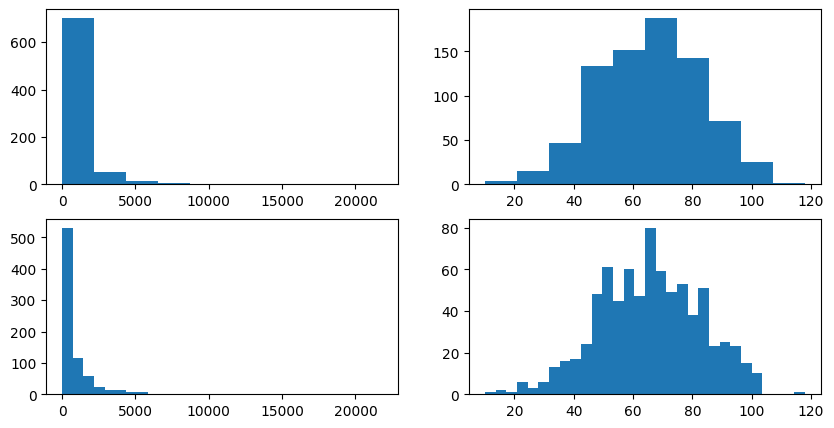

In [8]:
#I just plotted 2 vars, do your own thing.
fig, axes = subplots(nrows=2,ncols=2,figsize=(10, 5))
axes[0,0].hist(college['P.Undergrad'])
axes[1,0].hist(college['P.Undergrad'],bins=30)

axes[0,1].hist(college['Grad.Rate'])
axes[1,1].hist(college['Grad.Rate'],bins=30)
print(fig)
#fyi love the college with a graduation rate of 118%

## 8h.

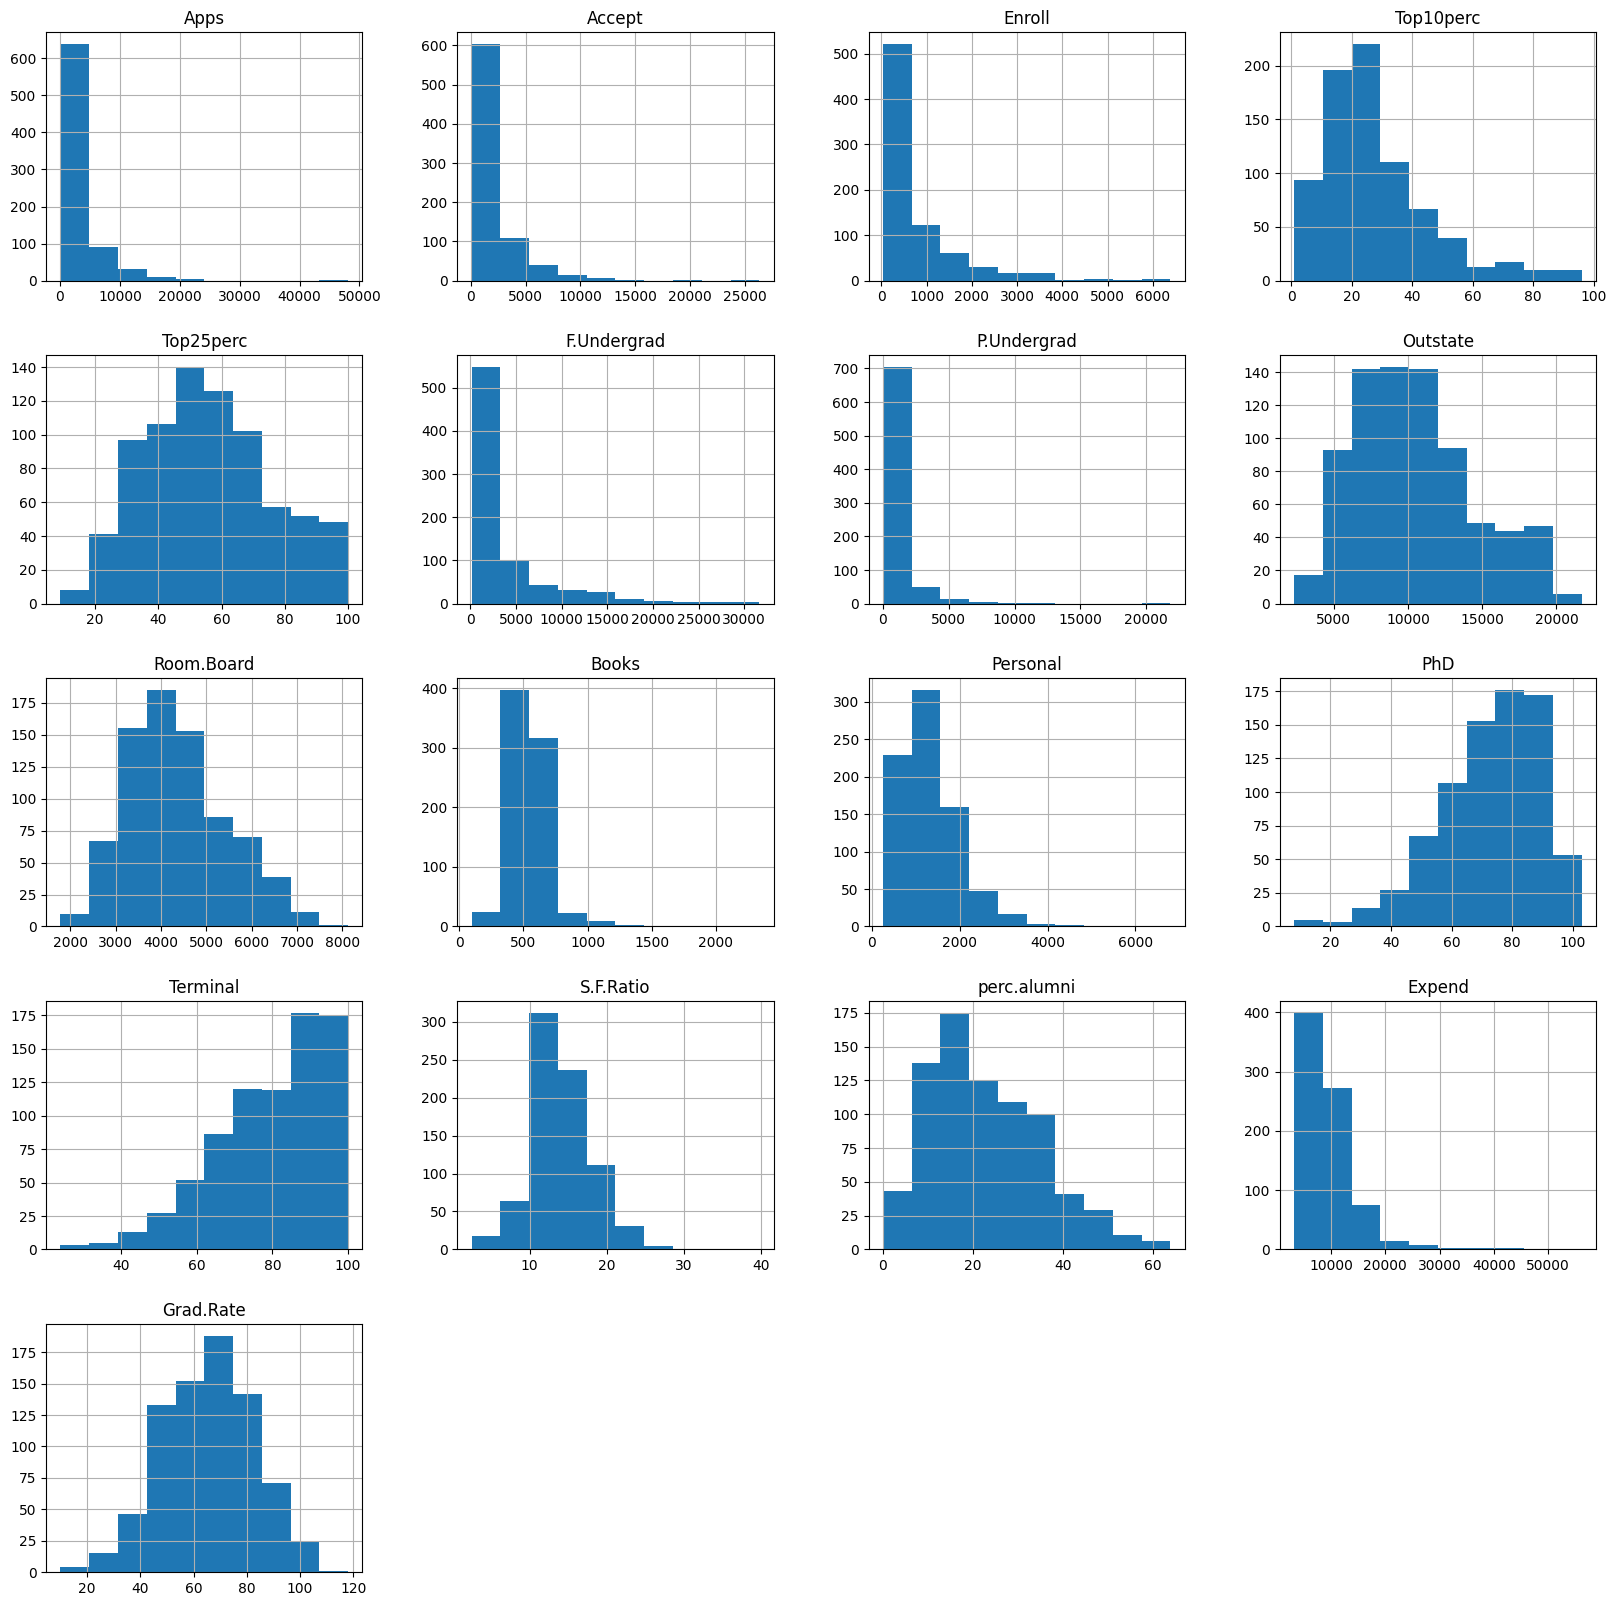

In [9]:
#do your own exploration, I just plotted the variables
college.hist(figsize=(20,20));

## Problem #9

## 9a.

In [10]:
from ISLP import load_data
Auto = load_data('Auto')
print(Auto.columns)
print(Auto.head())

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


#### Quantitative: mpg, cylinders, displacement, horsepower, weight, acceleration and year
#### Qualitative: origin and name (origin is a factor for original country)
##### detailed explanation of datasets in ISLP here: https://islp.readthedocs.io/en/latest/data.html

## 9b.

In [11]:
quantitative_auto = Auto.drop(['origin','name'],axis=1)
ranges = []
for i in range(len(quantitative_auto.columns)):
    ranges.append(max(quantitative_auto.iloc[:,i])-min(quantitative_auto.iloc[:,i]))

column_ranges = pd.DataFrame({'Column_name':quantitative_auto.columns,'Range':ranges})
column_ranges


,Column_name,Range
0,mpg,37.6
1,cylinders,5.0
2,displacement,387.0
3,horsepower,184.0
4,weight,3527.0
5,acceleration,16.8
6,year,12.0


## 9c.

In [12]:
mean = []
std_dev = []
for i in range(len(quantitative_auto.columns)):
    mean.append(np.mean(quantitative_auto.iloc[:,i]))
    std_dev.append(np.std(quantitative_auto.iloc[:,i]))
    

df_mean_std_dev = pd.DataFrame({'Column_name':quantitative_auto.columns,'mean':mean,'std_dev':std_dev})
df_mean_std_dev


,Column_name,mean,std_dev
0,mpg,23.445918,7.795046
1,cylinders,5.471939,1.703606
2,displacement,194.411990,104.510444
3,horsepower,104.469388,38.442033
4,weight,2977.584184,848.318447
5,acceleration,15.541327,2.755343
6,year,75.979592,3.679035


## 9d.

In [13]:
sliced_auto = quantitative_auto.iloc[:10,:].append(quantitative_auto.iloc[85:,:])

sliced_mean = []
sliced_std_dev = []
sliced_ranges = []

for i in range(len(sliced_auto.columns)):
    sliced_mean.append(np.mean(sliced_auto.iloc[:,i]))
    sliced_std_dev.append(np.std(sliced_auto.iloc[:,i]))
    sliced_ranges.append(max(sliced_auto.iloc[:,i])-min(sliced_auto.iloc[:,i]))

sliced_df = pd.DataFrame({'Column_name':sliced_auto.columns,'range':sliced_ranges,'mean':sliced_mean,'std_dev':sliced_std_dev})
print(sliced_df)


#for comparison, including the data of full data set:
non_sliced_df = pd.merge(column_ranges,df_mean_std_dev)
print('\n',non_sliced_df)

    Column_name   range         mean     std_dev
0           mpg    35.6    24.374763    7.860137
1     cylinders     5.0     5.381703    1.655517
2  displacement   387.0   187.880126  100.011852
3    horsepower   184.0   101.003155   35.946376
4        weight  3348.0  2938.854890  810.359466
5  acceleration    16.3    15.704101    2.715619
6          year    12.0    77.123028    3.122222

     Column_name   Range         mean     std_dev
0           mpg    37.6    23.445918    7.795046
1     cylinders     5.0     5.471939    1.703606
2  displacement   387.0   194.411990  104.510444
3    horsepower   184.0   104.469388   38.442033
4        weight  3527.0  2977.584184  848.318447
5  acceleration    16.8    15.541327    2.755343
6          year    12.0    75.979592    3.679035


C:\Users\Thomas\AppData\Local\Temp\ipykernel_21004\2224069982.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sliced_auto = quantitative_auto.iloc[:10,:].append(quantitative_auto.iloc[85:,:])


## 9e/9f

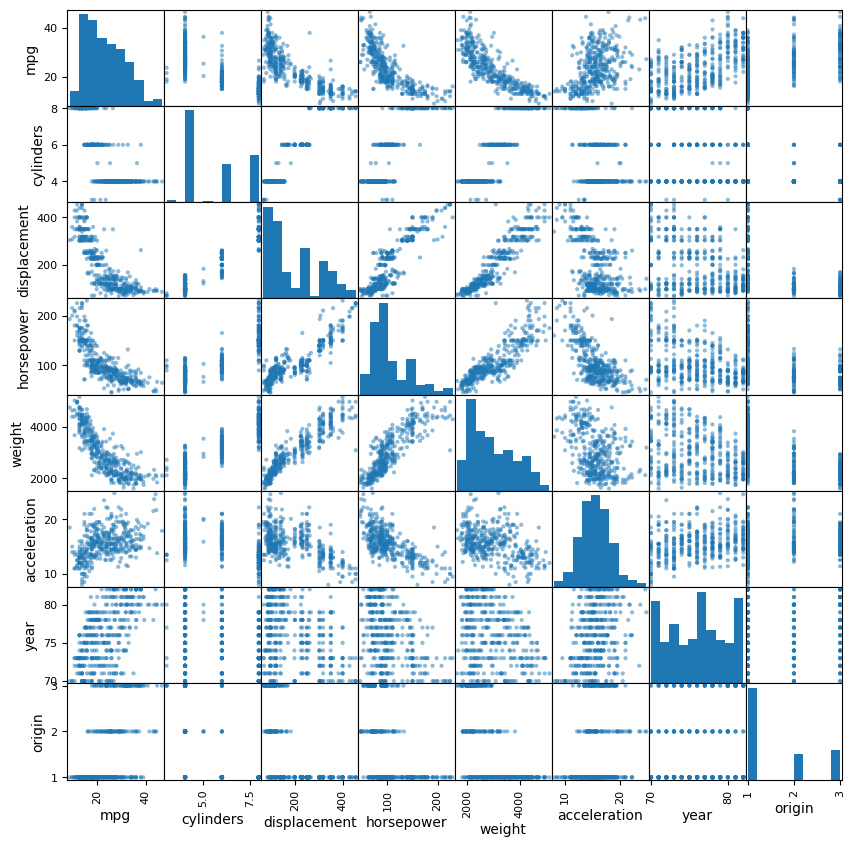

In [14]:
#up to self exploration, just created scatter matrix for inspo.
pd.plotting.scatter_matrix(Auto,figsize=(10,10));

## Problem #10

## 10a.

In [15]:
boston = ISLP.load_data('Boston')

## 10b.

In [16]:
boston.shape
#506 rows, 13 columns

(506, 13)

## 10c.

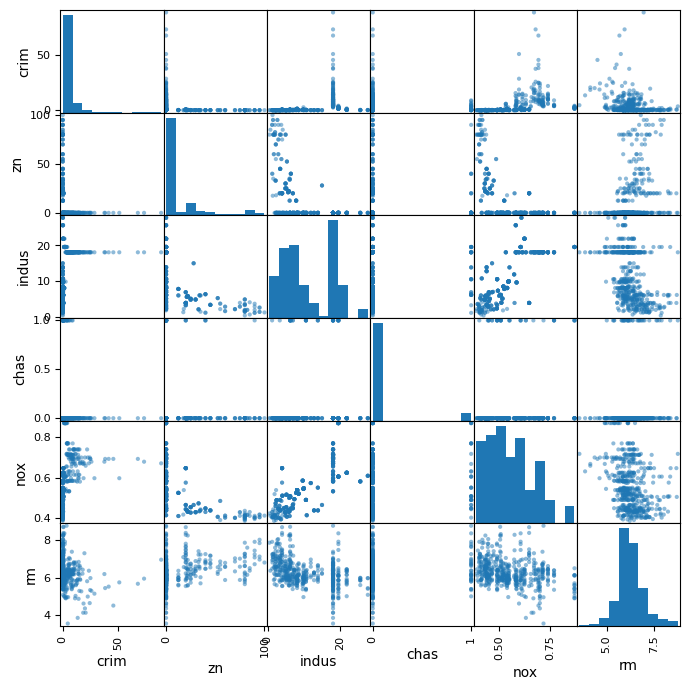

In [17]:
pd.plotting.scatter_matrix(boston.iloc[:,:6],figsize=(8,8));

## 10d.

Figure(500x4000)


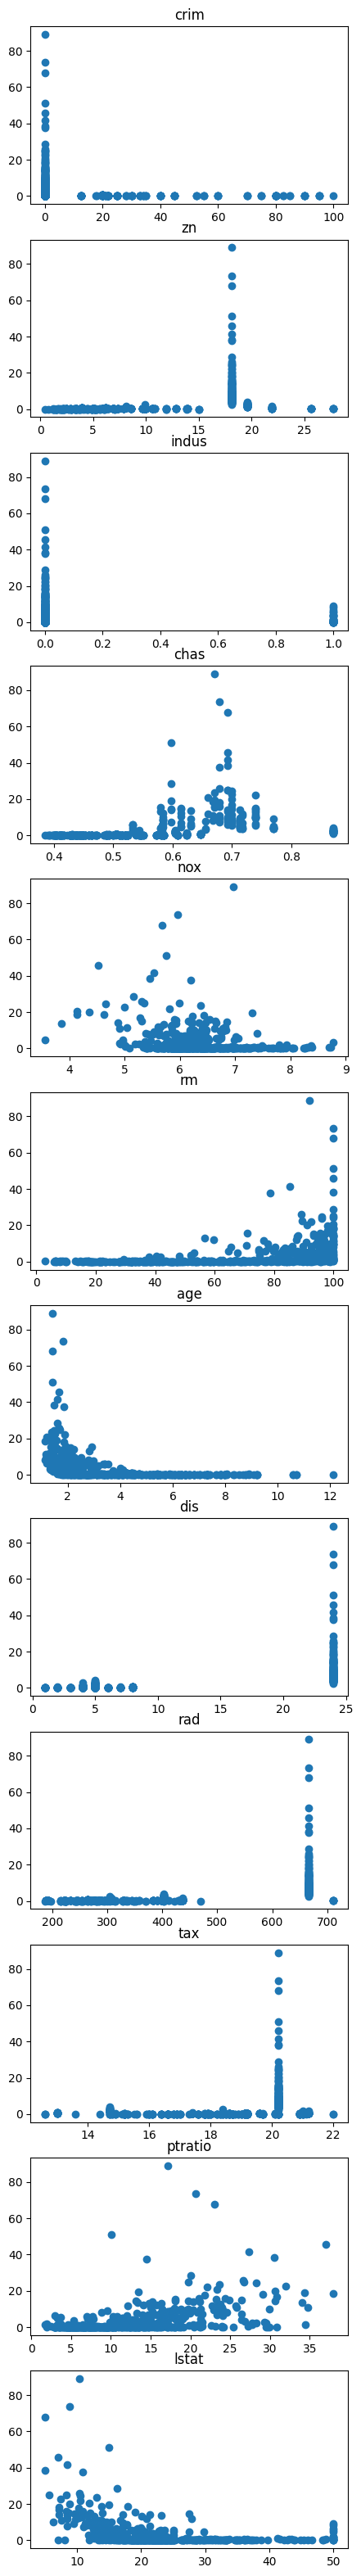

In [18]:
#did a for loop for all values
#to be quicker, could also do a scatter matrix or individual plots for variables of interest

fig, axes = subplots(nrows=len(boston.columns)-1,figsize=(5, 40))
for i in range(len(boston.columns)-1):
    axes[i].scatter(boston.iloc[:,i+1],boston['crim'])
    axes[i].title.set_text(boston.columns[i])
print(fig)

- lstat and age look to be negatively correlated with crime rate.
- ptratio and rm look to be positively correlated.

## 10e.

[[<Axes: title={'center': 'crim'}>]]
[[<Axes: title={'center': 'tax'}>]]
[[<Axes: title={'center': 'ptratio'}>]]


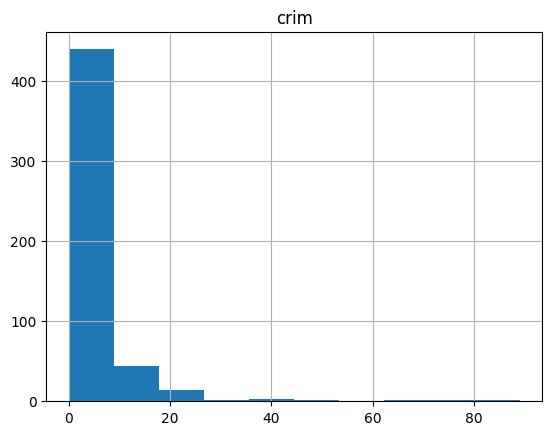

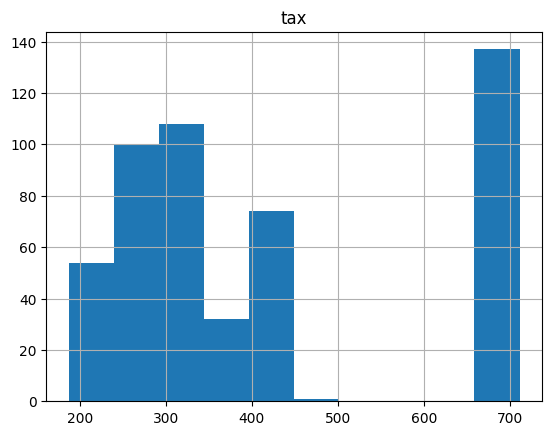

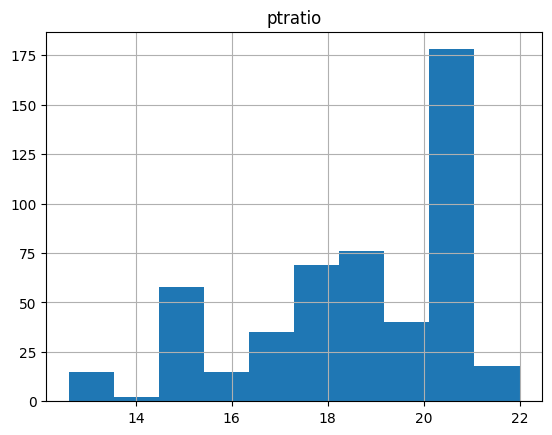

In [19]:
#histogram the quickest visual test for outliers.
print(boston.hist('crim'));
print(boston.hist('tax'));
print(boston.hist('ptratio'));

## 10f.

In [20]:
# checking documentation here, https://islp.readthedocs.io/en/latest/datasets/Boston.html
# need to check for chas=1

boston['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

## 10g.

In [21]:
boston['ptratio'].mean()

18.455533596837945

## 10h.

In [30]:
#each row is a suburb
print(boston[boston['medv']==min(boston['medv'])])

#for reference pulled .describe() method for the dataset
boston.describe()

        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   

     ptratio  lstat  medv  
398     20.2  30.59   5.0  
405     20.2  22.98   5.0  


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


the suburbs with the minimum housing value have very high crime rates, very old buildings and a quite high percentage of non-retail business.

## 10i.

In [37]:
print('suburbs with avg. rooms over 7: ',boston[boston['rm']>7].shape[0])
print('suburbs with avg. rooms over 8: ',boston[boston['rm']>8].shape[0])

#again, comparing more than 8 to descriptor stats of the entire table.
print(boston[boston['rm']>8].describe())
print(boston.describe())

suburbs with avg. rooms over 7:  64
suburbs with avg. rooms over 8:  13
            crim         zn      indus       chas        nox         rm  \
count  13.000000  13.000000  13.000000  13.000000  13.000000  13.000000   
mean    0.718795  13.615385   7.078462   0.153846   0.539238   8.348538   
std     0.901640  26.298094   5.392767   0.375534   0.092352   0.251261   
min     0.020090   0.000000   2.680000   0.000000   0.416100   8.034000   
25%     0.331470   0.000000   3.970000   0.000000   0.504000   8.247000   
50%     0.520140   0.000000   6.200000   0.000000   0.507000   8.297000   
75%     0.578340  20.000000   6.200000   0.000000   0.605000   8.398000   
max     3.474280  95.000000  19.580000   1.000000   0.718000   8.780000   

             age        dis        rad         tax    ptratio      lstat  \
count  13.000000  13.000000  13.000000   13.000000  13.000000  13.000000   
mean   71.538462   3.430192   7.461538  325.076923  16.361538   4.310000   
std    24.608723   1.883